# Japan Used Cars Price Prediction

### Problem Statement:
Cars' data was scraped from tc-v.com and it included Information about Japan's largest online used car marketplace. Ten features were assembled for each car in the dataset.

# Import required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy import stats
from scipy.stats import skew
import pylab


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import joblib
import warnings
warnings.filterwarnings('ignore')

# Import the dataset

In [9]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv")
df

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [10]:
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

Above is the list of all columns.

In [11]:
df.shape

(2318, 11)

**Dataset has 2318 rows and 11 columns.**

In [12]:
df.dtypes

id                  int64
price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

We can see both type of columns numerical and object type.

In [14]:
df.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


In [16]:
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

<AxesSubplot:>

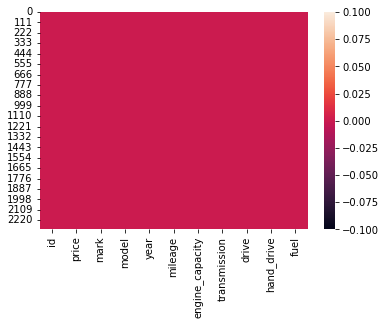

In [17]:
#Let's see it with the help of heatmap:
sns.heatmap(df.isnull())

our dataset does not contains null values.

In [20]:
df['price']

0         80
1        110
2        165
3        190
4        190
        ... 
2313    1400
2314    1400
2315    1400
2316    1400
2317    1400
Name: price, Length: 2318, dtype: int64

In [22]:
#checking unique values for all object type columns
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, ":", df[i].nunique())

mark : 28
model : 258
transmission : 3
drive : 3
hand_drive : 3
fuel : 5


In [23]:
data['year'].value_counts()

2005    365
2007    318
2003    248
2006    199
2009    199
2004    194
2011    173
2010    153
2008     91
2002     82
2001     77
2013     52
2012     42
1999     32
2000     27
1998     13
1997     13
1996      6
1995      6
1993      5
1994      4
2014      4
1990      4
1991      3
1992      3
1979      1
1982      1
2015      1
1987      1
1988      1
Name: year, dtype: int64

# Let's Check the correlation now:

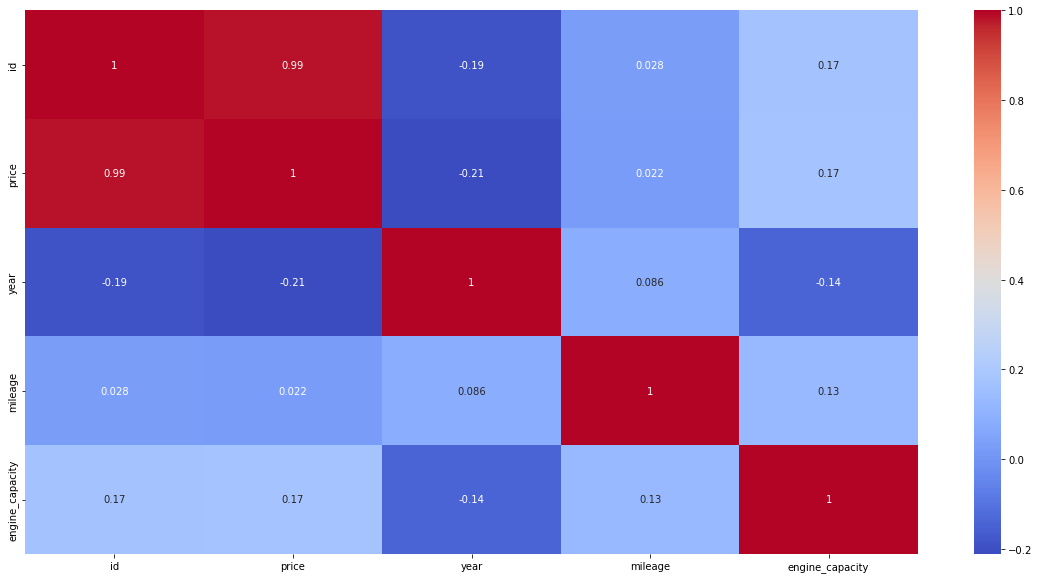

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

Let's change the data type of other object type columns.

In [25]:
df.dtypes

id                  int64
price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

# Encoding:

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].astype(str).values.reshape(-1,1))

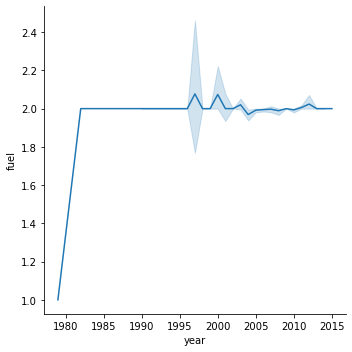

In [28]:
sns.relplot(x='year', y='fuel',data=df, kind='line')

We can see positive relation between year and fuel.

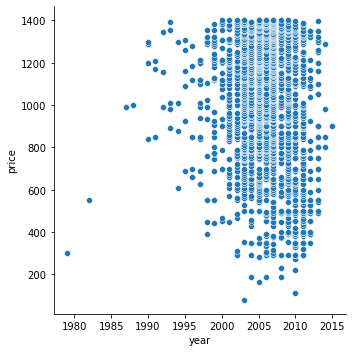

In [30]:
sns.relplot(x='year', y='price',data=df, kind='scatter')

We can see positive relation between year and Price.

<AxesSubplot:>

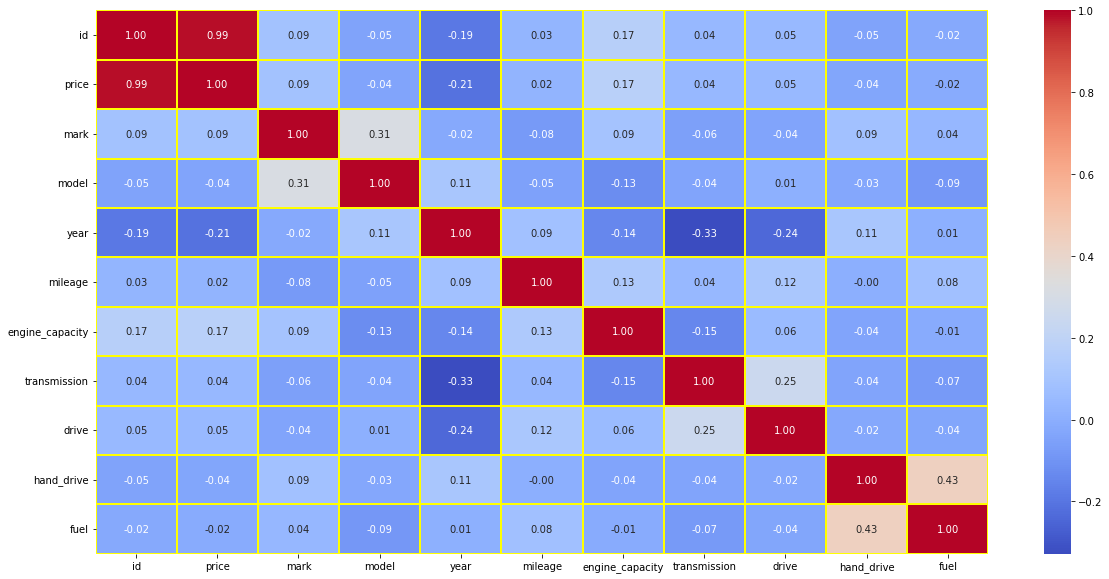

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="yellow",fmt="0.2f",cmap="coolwarm")

Checking the columns which are positively and negative correlated with the target columns:

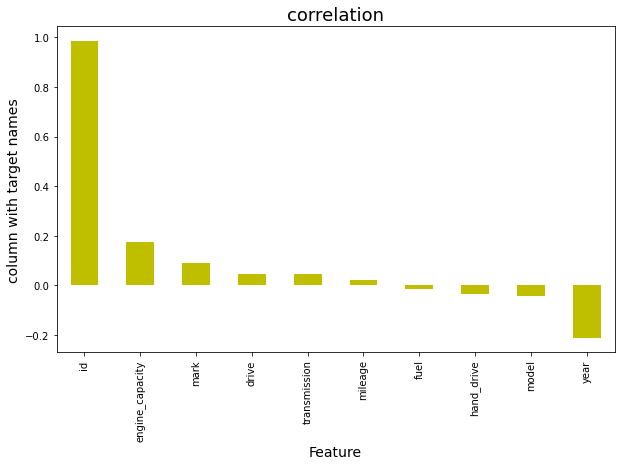

In [34]:
plt.figure(figsize=(10,6))
df.corr()['price'].sort_values(ascending=False).drop(['price']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Our target column Price is positively correlated with id and has negative correlation with year column.

In [35]:
x=df.drop('price', axis=1)
y=df['price']
print(x.shape)
print(y.shape)

(2318, 10)
(2318,)


Other than price all other columns object type hence Skewness and outliers removal is not required.

# Finding best random state:

In [36]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    Ln=LinearRegression()
    Ln.fit(x_train,y_train)
    pred=Ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is ",maxAcc, " at Random State ",maxRS)

Best accuracy is  0.9776052422157286  at Random State  46


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [37]:
model=[LinearRegression(),AdaBoostRegressor(),ElasticNet(alpha=0.0001),
       KNeighborsRegressor(),DecisionTreeRegressor(), BaggingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    #sc=m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(y_test,predm)
    print('Accuracy Score of',m,'is:',acc * 100,"%")
    print('mean_absolute_error:',mean_absolute_error(y_test,predm))
    print('mean_squared_error:',mean_squared_error(y_test,predm))
    print('Root mean_squared_error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("\n")

Accuracy Score of LinearRegression() is: 96.55984883257044 %
mean_absolute_error: 37.89589781212929
mean_squared_error: 3162.020344906924
Root mean_squared_error: 56.231844580334766


Accuracy Score of AdaBoostRegressor() is: 99.46319582276043 %
mean_absolute_error: 16.56857954480561
mean_squared_error: 493.4044020312181
Root mean_squared_error: 22.212708120155412


Accuracy Score of ElasticNet(alpha=0.0001) is: 96.55984087112262 %
mean_absolute_error: 37.89573739774722
mean_squared_error: 3162.0276626841833
Root mean_squared_error: 56.231909648207605


Accuracy Score of KNeighborsRegressor() is: 79.52280028354758 %
mean_absolute_error: 95.70905172413794
mean_squared_error: 18821.650258620688
Root mean_squared_error: 137.19201966084137


Accuracy Score of DecisionTreeRegressor() is: 99.97065556579217 %
mean_absolute_error: 1.0237068965517242
mean_squared_error: 26.97198275862069
Root mean_squared_error: 5.193455762651752


Accuracy Score of BaggingRegressor() is: 99.95745739359508 %
me

Heighest Accurecy is AdaboostRegressor which is 99.46%

# Hyperparameter tunning:

In [38]:
from sklearn.model_selection import RandomizedSearchCV

LinearRegression

In [40]:
parameters1={'fit_intercept':[True, False],'normalize':[True, False],
            'copy_X':[True, False],'positive':[True, False],
            'n_jobs':range(0,20)}

In [41]:
RSV1=RandomizedSearchCV(LinearRegression(),parameters1,cv=5)

In [42]:
RSV1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': range(0, 20),
                                        'normalize': [True, False],
                                        'positive': [True, False]})

In [43]:
RSV1.best_params_

{'positive': False,
 'normalize': True,
 'n_jobs': 11,
 'fit_intercept': True,
 'copy_X': False}

In [44]:
RSV1_pred=RSV1.best_estimator_.predict(x_test) 

In [45]:
RSV1_pred

array([ 601.43834903,  567.67554406, 1427.58995788,  550.57003465,
        860.55689983,  664.79491828,  767.09694045,  829.10561049,
       1235.88754767, 1423.00559228,  603.8130024 , 1386.98938526,
       1101.82524052, 1116.09242079,  629.73701718, 1422.68369151,
       1431.69749469,  485.85271575,  489.00496967,  498.40424412,
        567.92881336, 1267.11332298,  654.49877688, 1184.55308881,
        573.66725345,  801.55431948,  915.18858241,  800.67855177,
        746.1803624 ,  878.52734062, 1280.78599521,  826.2015596 ,
       1093.22968726,  586.8966244 , 1088.32011276, 1087.70453707,
       1407.42219271,  659.53500481,  549.66416904, 1003.80688897,
       1244.95510178,  505.45794559,  661.02328961, 1132.17441934,
        731.8910403 , 1171.95221962, 1006.70559372,  909.30177524,
       1376.09099785, 1097.79764593, 1202.35118526,  783.04151058,
        505.68432295,  623.51404261, 1098.955161  , 1270.22907644,
        805.83539297, 1258.61459878,  520.01880428,  599.79354

In [46]:
score1 = RSV1.score(x_train,y_train)

AdaBoostRegressor

In [47]:
param2={'n_estimators': [20, 50, 70, 100], 'learning_rate' : [0.01,0.05,0.1,0.3,1],
       'loss' : ['linear', 'square', 'exponential'],'random_state':range(0,20)}

In [48]:
RSV2=RandomizedSearchCV(AdaBoostRegressor(),param2,cv=5)

In [49]:
RSV2.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [20, 50, 70, 100],
                                        'random_state': range(0, 20)})

In [50]:
RSV2_pred=RSV2.best_estimator_.predict(x_test)

In [51]:
RSV2.best_params_

{'random_state': 4, 'n_estimators': 20, 'loss': 'square', 'learning_rate': 1}

In [52]:
RSV2_pred

array([ 602.86      ,  492.99250936, 1348.54393305,  492.99250936,
        888.43243243,  709.11815562,  782.02247191,  869.3630137 ,
       1224.14901961, 1348.54393305,  603.6519337 , 1348.54393305,
       1109.53818182, 1109.53818182,  620.11357341, 1348.54393305,
       1348.54393305,  333.1       ,  212.22282609,  355.63207547,
        567.12448133, 1226.44700461,  665.51010101, 1217.8984375 ,
        567.12448133,  869.3630137 ,  948.57586207,  869.3630137 ,
        762.83404255,  901.80275229, 1253.07407407,  870.41916168,
       1109.53818182,  567.12448133, 1109.53818182, 1101.70212766,
       1348.54393305,  709.11815562,  492.99250936, 1044.43426295,
       1224.14901961,  401.30147059,  672.60714286, 1112.40703518,
        759.21333333, 1217.8984375 , 1044.43426295,  948.57586207,
       1344.81040892, 1109.53818182, 1217.8984375 ,  821.01976285,
        401.30147059,  603.6519337 , 1109.53818182, 1244.22408027,
        869.3630137 , 1253.07407407,  410.39087948,  567.12448

In [53]:
score2 = RSV2.score(x_train,y_train)

ElasticNet

In [54]:
parameters3={'fit_intercept':[True, False],'normalize':[True, False],'precompute':[True, False],
            'copy_X':[True, False],'positive':[True, False],'warm_start':[True, False],
            'random_state':range(0,20),'l1_ratio':[0.5,1], 'selection':['cyclic','random']}

In [55]:
RSV3=RandomizedSearchCV(ElasticNet(alpha=0.0001),parameters3,cv=5)

In [56]:
RSV3.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=ElasticNet(alpha=0.0001),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0.5, 1],
                                        'normalize': [True, False],
                                        'positive': [True, False],
                                        'precompute': [True, False],
                                        'random_state': range(0, 20),
                                        'selection': ['cyclic', 'random'],
                                        'warm_start': [True, False]})

In [57]:
RSV3.best_params_

{'warm_start': False,
 'selection': 'cyclic',
 'random_state': 9,
 'precompute': False,
 'positive': True,
 'normalize': True,
 'l1_ratio': 1,
 'fit_intercept': False,
 'copy_X': True}

In [58]:
RSV3_pred=RSV3.best_estimator_.predict(x_test) 

In [59]:
RSV3_pred

array([ 603.03916472,  568.11110803, 1439.21096873,  547.18391993,
        854.85289297,  661.90119944,  771.10873159,  829.97167813,
       1232.74409021, 1417.73353502,  612.55410125, 1392.94195351,
       1087.91256476, 1108.25749652,  624.68643489, 1423.5518652 ,
       1420.10701839,  490.98713354,  481.30164914,  497.67485286,
        571.42351428, 1264.79371106,  650.63417329, 1180.34568154,
        581.88449979,  803.27977271,  904.02263927,  802.41720325,
        735.45553505,  867.71550016, 1278.54621528,  830.47797288,
       1088.40214921,  584.79291662, 1091.99006997, 1082.97696594,
       1403.4183113 ,  671.48289047,  558.66746014, 1005.02193404,
       1245.07571875,  515.56071906,  657.60624244, 1118.20190144,
        723.12887404, 1171.42244995, 1007.95579981,  918.62316096,
       1373.23740201, 1094.96624978, 1203.12888091,  782.3666345 ,
        513.98646338,  618.22581237, 1093.10163623, 1272.31766985,
        798.96175455, 1269.87162731,  526.12141589,  591.59178

In [60]:
score3 = RSV3.score(x_train,y_train)

KNeighborsRegressor

In [61]:
parameters4={'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],
            'n_jobs':range(0,20)}

In [62]:
RSV4=RandomizedSearchCV(KNeighborsRegressor(),parameters4,cv=5)

In [63]:
RSV4.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_jobs': range(0, 20),
                                        'weights': ['uniform', 'distance']})

In [64]:
RSV4.best_params_

{'weights': 'distance', 'n_jobs': 1, 'algorithm': 'kd_tree'}

In [65]:
RSV4_pred=RSV4.best_estimator_.predict(x_test) 

In [66]:
RSV4_pred

array([ 701.7687636 ,  721.85422165, 1272.73578338,  615.72498311,
        871.28684685,  655.58846816,  487.72064703,  873.25476552,
       1257.03784045, 1331.78449926,  549.60082023, 1264.77950642,
       1073.12287155, 1163.44696754,  678.6327457 , 1286.22465262,
       1312.50690141,  586.13924451,  627.39824295,  548.12185626,
        676.31218222, 1250.02954965,  742.90851451, 1170.25643667,
        563.94372501,  850.43711614,  999.92485161,  850.68745946,
        699.24580794,  899.81423819, 1219.6079544 ,  829.01717988,
       1102.13950525,  705.21489526, 1132.23458811, 1014.92278986,
        962.81832308,  701.46920124,  513.4596436 ,  977.07720676,
       1211.37823535,  727.66486289,  846.71932872, 1190.86775694,
        715.795359  , 1186.34564033, 1061.56449213,  939.56841028,
       1258.06898781, 1161.60734174, 1120.56486868,  808.5487502 ,
        456.15813719,  654.2965218 , 1090.73327629, 1239.10200764,
        777.76601705, 1173.74000869, 1115.96726851,  658.03057

In [67]:
score4 = RSV4.score(x_train,y_train)

DecisionTreeRegressor

In [68]:
parameters5={'criterion':['mse', "friedman_mse", "mae", 'poisson'],'splitter':['best','random'],
            'max_features':['auto','sqrt','log2'],'random_state':range(0,20)}

In [69]:
RSV5=RandomizedSearchCV(DecisionTreeRegressor(),parameters5,cv=5)

In [70]:
RSV5.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'random_state': range(0, 20),
                                        'splitter': ['best', 'random']})

In [71]:
RSV5.best_params_

{'splitter': 'best',
 'random_state': 6,
 'max_features': 'auto',
 'criterion': 'poisson'}

In [72]:
RSV5_pred=RSV5.best_estimator_.predict(x_test)

In [73]:
RSV5_pred

array([ 590.,  500., 1381.,  490.,  900.,  680.,  800.,  850., 1220.,
       1370.,  610., 1353., 1120., 1120.,  630., 1380., 1381.,  290.,
        190.,  340.,  541., 1250.,  660., 1190.,  550.,  850.,  940.,
        850.,  790.,  910., 1260.,  860., 1110.,  550., 1110., 1104.,
       1362.,  700.,  500., 1040., 1230.,  390.,  663., 1123.,  775.,
       1185., 1040.,  950., 1334., 1120., 1209.,  820.,  390.,  620.,
       1120., 1255.,  840., 1260.,  650.,  570.,  750., 1350., 1310.,
       1110.,  588.,  880.,  600.,  490.,  625.,  390.,  900.,  429.,
       1320., 1262., 1026.,  850., 1306., 1213.,  840.,  920.,  790.,
        900., 1320., 1381.,  350., 1306., 1120.,  630., 1220., 1380.,
        790., 1200.,  990.,  840.,  490., 1100., 1017., 1165., 1250.,
        859.,  715.,  350.,  650.,  940., 1320.,  760.,  850.,  740.,
       1016., 1204., 1260., 1306.,  700., 1080., 1213.,  690., 1166.,
       1250., 1200.,  772., 1260., 1213., 1101.,  933.,  750.,  390.,
        710., 1198.,

In [74]:
score5 = RSV5.score(x_train,y_train)

BaggingRegressor

In [75]:
#creating  parameter list to pass in RandomizedSearchCV
param6={'base_estimator':[None],'n_estimators':[0,2,5,10],
      'bootstrap':[True,False],'oob_score':[True,False],'warm_start':[True,False],
       'bootstrap_features':[True,False],'random_state':range(0,20)}

In [76]:
RSV6=RandomizedSearchCV(BaggingRegressor(),param6,cv=5)

In [77]:
RSV6.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=BaggingRegressor(),
                   param_distributions={'base_estimator': [None],
                                        'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'n_estimators': [0, 2, 5, 10],
                                        'oob_score': [True, False],
                                        'random_state': range(0, 20),
                                        'warm_start': [True, False]})

In [78]:
RSV6.best_params_

{'warm_start': False,
 'random_state': 0,
 'oob_score': False,
 'n_estimators': 10,
 'bootstrap_features': False,
 'bootstrap': False,
 'base_estimator': None}

In [79]:
RSV6_pred=RSV6.best_estimator_.predict(x_test) 

In [80]:
RSV6_pred

array([ 590. ,  497.5, 1381. ,  490. ,  900. ,  679.7,  800. ,  850. ,
       1220. , 1370. ,  613.6, 1353. , 1120. , 1120. ,  630. , 1380. ,
       1381. ,  290. ,  190. ,  340. ,  541. , 1250. ,  660. , 1190. ,
        550. ,  850. ,  940. ,  850. ,  790. ,  910. , 1260. ,  860.6,
       1110. ,  550. , 1110. , 1104. , 1362. ,  700. ,  500. , 1040. ,
       1230. ,  390. ,  661.5, 1123. ,  775. , 1185. , 1040. ,  950. ,
       1334. , 1120. , 1209. ,  820. ,  390. ,  620. , 1120. , 1255. ,
        840. , 1260.6,  400.5,  570. ,  750. , 1350. , 1311.5, 1110. ,
        587.6,  880. ,  600. ,  490. ,  500. ,  287.2,  900. ,  429.3,
       1320. , 1261.4, 1026. ,  850. , 1306. , 1213. ,  840. ,  920. ,
        790. ,  900. , 1320. , 1381. ,  350. , 1306. , 1120. ,  630. ,
       1220. , 1380. ,  790. , 1200. ,  990. ,  840. ,  490. , 1100. ,
       1017. , 1165. , 1250. ,  859. ,  719. ,  350. ,  650. ,  940. ,
       1320. ,  760. ,  850. ,  740. , 1016. , 1204. , 1260. , 1306. ,
      

In [81]:
score6 = RSV6.score(x_train,y_train)

After performing RandomizedSearchCV method accuracy:

In [85]:
print("Accuracy for LinearRegression is ",score1*100,"%\n")
print("Accuracy for AdaBoostRegressor is ",score2*100,"%\n")
print("Accuracy for ElasticNet(alpha=0.0001) is ",score3*100,"%\n")
print("Accuracy for KNeighborsRegressor is ",score4*100,"%\n")
print("Accuracy for DecisionTreeRegressor is ",score5*100,"%\n")
print("Accuracy for BaggingRegressor is ",score6*100,"%")

Accuracy for LinearRegression is  97.2958123857843 %

Accuracy for AdaBoostRegressor is  99.59627798743968 %

Accuracy for ElasticNet(alpha=0.0001) is  97.23175254206062 %

Accuracy for KNeighborsRegressor is  100.0 %

Accuracy for DecisionTreeRegressor is  100.0 %

Accuracy for BaggingRegressor is  100.0 %


Selecting KNeighborsRegressor as final model for saving, as it was having good accuracy .